In [1]:
import numpy as np
import random
import networkx as nx
import operator
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os
import io
import re
from collections import Counter
% matplotlib inline

# Part One: Network Models



## Watts-Strogatz Networks
###  (1.1)
 *  Watts-Strogatz Networks
Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$. 




In [2]:
def calculate_average_shortest_path_with_watts_strogatz(n, k, p_list):
    for p in p_list:
        print("Rewiring probability = %f" % p)
        graph = nx.watts_strogatz_graph(n,k,p)
        d = nx.average_shortest_path_length(graph)
        print("Average shortest path length d = %f" %d)
        print("\n")
        


In [3]:

n = 500
k = 4
p_list = [0,0.1,1] 

calculate_average_shortest_path_with_watts_strogatz(n, k, p_list)

Rewiring probability = 0.000000
Average shortest path length d = 62.875752


Rewiring probability = 0.100000
Average shortest path length d = 7.428593


Rewiring probability = 1.000000
Average shortest path length d = 4.735190




#### Comments to (1.1)

> The average shortest path length gets close to the average degree, when p = 1.

> The average shortest path lengths was around 4.8 for the Watts Strogatz network with rewiring probability 1.

### (1.2)
 * Let's understand the behavior of the WS model as we increase p in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot.

In [4]:
def generate_networks(number_of_networks, n, k, p_list):
    list_mean = list()
    list_std = list()
    for p in p_list:
        list_average_d = list()
        for number in range(number_of_networks):     
            graph = nx.watts_strogatz_graph(n,k,p)
            d = nx.average_shortest_path_length(graph)
            list_average_d.append(d)
            
        mean = np.mean(list_average_d)
        std = np.std(list_average_d)
        list_mean.append(mean)
        list_std.append(std)
    return list_mean, list_std
    
def generate_error_bar_plot(list_mean, list_std):
    matplotlib.rcParams.update({'font.size': 15})
    plt.figure(num=None, figsize=(12, 8))
    x = np.arange(len(list_mean))
    plt.errorbar(np.array(p_list), list_mean,  yerr=list_std, marker='s',ms=3)
    plt.title("Figure to (1.2)\n\n Errorbar plot of 50 WS networks generated with k = 4 and n = 500 \n for each $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$ \n")
    plt.ylabel("Average degree <d>")
    plt.xlabel("Probability (p)")
    plt.xlim(-0.01,0.22)
    plt.figtext(.02, .02,"The standard deviation and average degree <d> quickly decreases with higher p. The standard deviation is highest at p = 0.01 ")


    



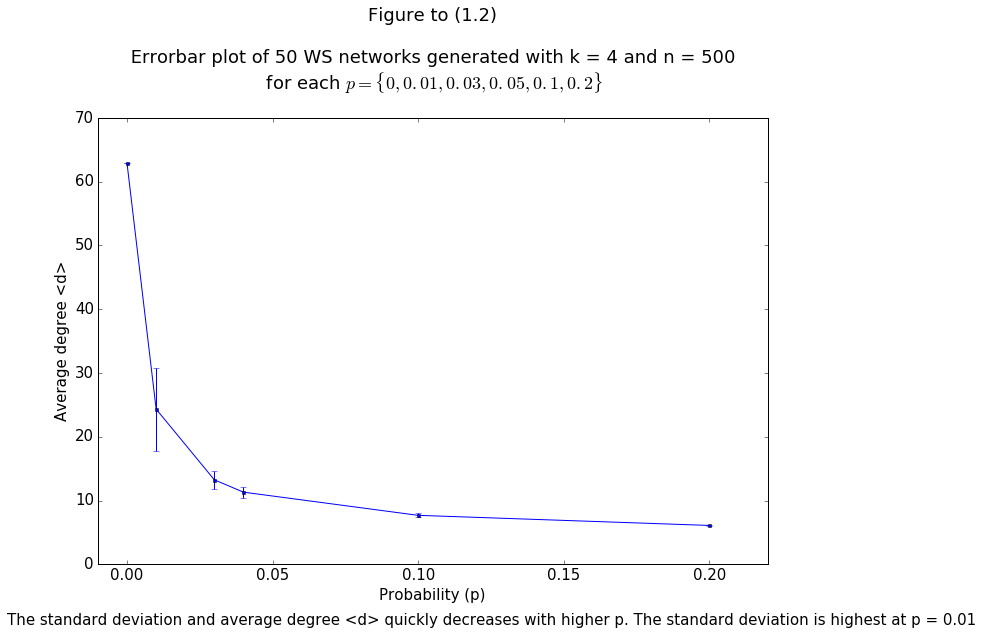

In [5]:
n = 500
k = 4
p_list = [0,0.01,0.03,0.04,0.1,0.2]
number_of_networks = 50

list_mean, list_std = generate_networks(number_of_networks, n, k, p_list)

generate_error_bar_plot(list_mean,list_std)

# The Barabasi-Albert Model
We're going to create our own Barabasi-Albert model (a special case) in right in a notebook. Follow the recipe below for success

### (2.1)
 * Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.


In [6]:
def draw_from_degree_propability(graph):
    edges = np.asarray(graph.edges())
    flat_edges = np.ndarray.flatten(edges)
    return random.choice(flat_edges)


def generate_100_node_BA_graph():
    graph = nx.Graph()

    graph.add_nodes_from([1,2])
    graph.add_edge(1,2)

    for node in range(3,101):
        existing_node = draw_from_degree_propability(graph)
        graph.add_edge(existing_node, node)
    
    return graph
   
def plot_100_node_BA():
    graph = generate_100_node_BA_graph()
    print("Network graph for (2.1) \nBarabasi Albert graph of with 100 nodes. Where the link for each node added is based the existing nodes degrees")
    nx.draw_spring(graph, node_size = 100)



Network graph for (2.1) 
Barabasi Albert graph of with 100 nodes. Where the link for each node added is based the existing nodes degrees


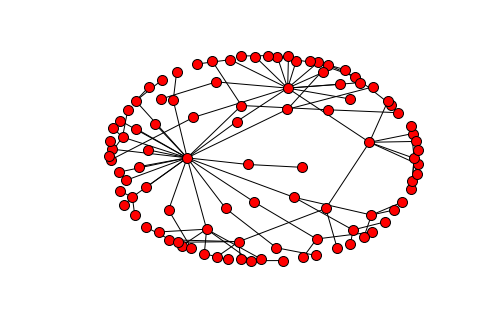

In [7]:
plot_100_node_BA()

 ### (2.2)
 * Now create a 5000 node network.
     - What's the maximum and minimum degree?
     - Now, bin the degree distribution, for example using numpy.histogram.
     - Plot the distribution. Plot it with both linear and log-log axes.

In [ ]:
def generate_5000_node_BA_network(graph):
    while len(graph.nodes()) < 5000:
        node = len(graph.nodes()) + 1
        existing_node = draw_from_degree_propability(graph)
        graph.add_edge(existing_node, node)
    return graph

def create_histogram_from_graph(graph):
    
    min_value = np.min(nx.degree(graph).values())
    max_value = np.max(nx.degree(graph).values())

    bin_vector = [i for i in range(min_value,max_value) ]
    hist, bin_edges = np.histogram(nx.degree(graph).values(), bins = bin_vector)
    
    return hist

def plot_degree_distribution_linear(hist):
    matplotlib.rcParams.update({'font.size': 15})
    plt.figure(num=None, figsize=(10, 8))
    plt.xlim(-5,120)
    plt.ylim(-100,3500)
    plt.title("Linear plot of degree distribution")
    plt.ylabel("Count")
    plt.xlabel("Degree k")
    plt.plot(hist,marker='o',linestyle='none')

def plot_degree_distrubution_log_log(hist):
        matplotlib.rcParams.update({'font.size': 15})
        plt.figure(num=None, figsize=(10, 8))
        plt.title("Log Log plot of degree distribution")
        plt.ylabel("Count")
        plt.xlabel("Degree k")
        plt.ylim([10**-0.1,10**3])
        plt.xlim([10**-0.1,10**2.5])
        plt.loglog(hist,marker='o',linestyle='none')

In [ ]:
# (2.2)
# Now create a 5000 node network
graph = generate_100_node_BA_graph()
graph = generate_5000_node_BA_network(graph)



In [ ]:
# What's the maximum and minimum degree?
maximum_degree = max(nx.degree(graph).iteritems(), key=operator.itemgetter(1))[1]
minimum_degree = min(nx.degree(graph).iteritems(), key=operator.itemgetter(1))[1]

print("The maximum degree is %d" %maximum_degree)
print("The mimimum degree is %d" %minimum_degree)

In [ ]:
# Now, bin the degree distribution, for example using numpy.histogram.
hist = create_histogram_from_graph(graph)


In [ ]:
# Plot the distribution. Plot it with both linear and log-log axes.
plot_degree_distribution_linear(hist)
print("\nOn the plot below is can be seen that there are many nodes with low degree and a few number of nodes with high degree")

In [ ]:
plot_degree_distrubution_log_log(hist)
print("On the log log plot below its clear that the degree distribution follows the power-law degree distribution.")
print("This is caused by the preferential attachment mechanism when constructing the BA network.")
print("The highly connected hub nodes has a higher probability of getting links added to them when constructing the network iteratively")
print("\nThe growth of the network is scale-free because of this construction mechanism")

# Power-laws and the friendship paradox
Next step is to explore the Friendship paradox. This paradox states that almost everyone have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

### (3.1)
* Pick a node i at random (e.g. use random.choice). Find its degree.
* Find i's neighbors. And calculate their average degree.
* Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

In [ ]:
def calculate_average_neighbor_degree(graph, neighbor_nodes):
    list_neightbor_degrees = list()
    for neighbor_node in neighbor_nodes:
        degree = graph.degree(neighbor_node)
        list_neightbor_degrees.append(degree)
    mean = np.mean(list_neightbor_degrees)    
    return mean

def compare_random_degree_to_neighbor_degree(graph):
    # Pick a node i at random (e.g. use random.choice).
    random_node = random.choice(graph.nodes())
    # Find its degree.
    random_node_degree = graph.degree(random_node)
    # Find i's neighbors.
    neighbor_nodes = graph.neighbors(random_node)
    # Calculate their average degree.
    average_neighbor_degree = calculate_average_neighbor_degree(graph,neighbor_nodes)
    
    # Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.
    return random_node_degree < average_neighbor_degree

def friendship_paradox_n_times(graph,n):
    result_list = list()
    for number in range(n):
        result_list.append(compare_random_degree_to_neighbor_degree(graph))
    return result_list
    

In [ ]:
result_list = friendship_paradox_n_times(graph,n=1000)
times_friendship_paradox_is_true = sum(result_list)

In [ ]:
print("Number of times the neighbors have a higher number of friends on average %d out of 1000 times." %times_friendship_paradox_is_true)
print("The friendship paradox is true for this network.")
print("\nThe high degree hubs drives up the average degree for the nodes connected to it.")
print("This causes the low degree nodes friends(neighbor nodes) to have more links on average then themselves.")
print("\nTherefore the only time when nodes have more links then their neighbor is if they are hubs.")

# Part Two: The Wikipedia Philosopher's network
This exercise assumes that you have downloaded and created the directed network of philosophers on Wikipedia, based on the six branches of philosophy on you own.

### (4.1)
* Let's put together some descriptive statistics:
 * How many philosophers in each list? How many total?
 * Which is the largest branch of philosophy? (according to number of Wikipedia philosopher-pages)
 * Which philosopher is in most lists & and how many?
 * Let's investigate philosophers active in multiple sub-fields in more detail.
      * Create a list of every philosopher that occurs in more than one list.
      * Use Python to sort the list according to how many lists each philosopher belongs to (so the guy you found in the previous question is first in that list).
      * Print the top 5 guys and their list counts. Have you heard of any of them?

In [ ]:
def create_philosopher_branch_list():
    regex = r'\[\[(:\w*:)?(.+?)\|.*?\]\]|\[\[(.+?)\]\]'
    philosopher_lists = list()
    counter = 0
    for txt_file in os.listdir("philosophers/"):

        file_path = os.path.join("philosophers",txt_file)
        print("Philosopher branch %s" %file_path)

        philosopher_branch_list =  parse_philosophers_branch(file_path,regex)
        counter += len(philosopher_branch_list)
        philosopher_lists.append(philosopher_branch_list)

    return philosopher_lists


def parse_philosophers_branch(file_path, regex):
    matches = apply_pattern_to_file(file_path,regex)
    philosopher_branch_list = list()
    parse_regex_matches(philosopher_branch_list, matches)
    
    return philosopher_branch_list

def apply_pattern_to_file(file_path,pattern):
    f = io.open(file_path,"r",encoding="utf-8")
    match = re.findall(pattern,f.read())
    f.close()
    return match

def parse_regex_matches(philosopher_branch_list, matches):
    
    for match in matches:
        language = ""
        name = ""
        if match[0] is not u"":
            language = match[0]
        else:
            language = "en"        
        if match[1] is not u"":
            name = match[1]
            philosopher_branch_list.append(name)            
        else:
            name = match[2] 
            philosopher_branch_list.append(name)
            
    print("Number of philosophers in branch %d" %len(matches))

def create_total_philosopher_list(philosopher_branch_lists):
    total_philosopher_list = list()

    for philosopher_branch in philosopher_branch_lists:
        for philosopher in philosopher_branch:
            total_philosopher_list.append(philosopher)

    return total_philosopher_list
    

* How many philosophers in each list?

In [ ]:
philosopher_branch_lists = create_philosopher_branch_list()

* How many total?

In [ ]:
total_philosopher_list = create_total_philosopher_list(philosopher_branch_lists)
print("Total number of philosophers %d" %len(set(total_philosopher_list)))

* Which is the largest branch of philosophy? (according to number of Wikipedia philosopher-pages)

The largest branch is "social and political" and it has 333 philosophers

In [ ]:
def create_dict_with_times_philosophers_accured_in_branches(total_philosopher_list):
    accurence_dict = Counter(total_philosopher_list)

    philo_times_accurence_list = list()

    for key, value in accurence_dict.iteritems():
        temp = [key,value]
        philo_times_accurence_list.append(temp)

    sorted_philo_times_accurence_list = sorted(philo_times_accurence_list, key=lambda x: x[1], reverse=True)
    return sorted_philo_times_accurence_list

* Which philosopher is in most lists & and how many?

In [ ]:
sorted_philo_times_accurence_list = create_dict_with_times_philosophers_accured_in_branches(total_philosopher_list)
sorted_philo_times_accurence_list[:2]

The philosophers in most lists are Thomas Aquinas and Aristotle both being in all branches. 

 * Let's investigate philosophers active in multiple sub-fields in more detail.
      * Create a list of every philosopher that occurs in more than one list.
      * Use Python to sort the list according to how many lists each philosopher belongs to (so the guy you found in the previous question is first in that list).
      * Print the top 5 guys and their list counts. Have you heard of any of them?

In [ ]:
sorted_philo_times_accurence_list[:5]

The number besides the name of the philosopher is the number of branches they are in.

The only ones that i have heard of before is Aristotle and Plato.